In [1]:
import os
import sys
import time

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 8.0)


import numpy as np
print(np.__version__)
import cv2
print(cv2.__version__)

from crnn_predictor import lstm_ocr_model


1.11.2
2.4.5


In [6]:
if True:

    json_path = 'model/crnn_ctc-symbol.json'
    param_path = 'model/crnn_ctc-0030.params'
    num_label = 9 # Set your max length of label, add one more for blank
    batch_size = 1
    num_hidden = 256
    num_lstm_layer = 2
    data_shape = (100, 32)
    classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    _lstm_ocr_model = lstm_ocr_model(json_path, param_path, classes, data_shape, batch_size, 
                                    num_label, num_hidden, num_lstm_layer)
    

(32, 75, 3) uint8
time:0.157


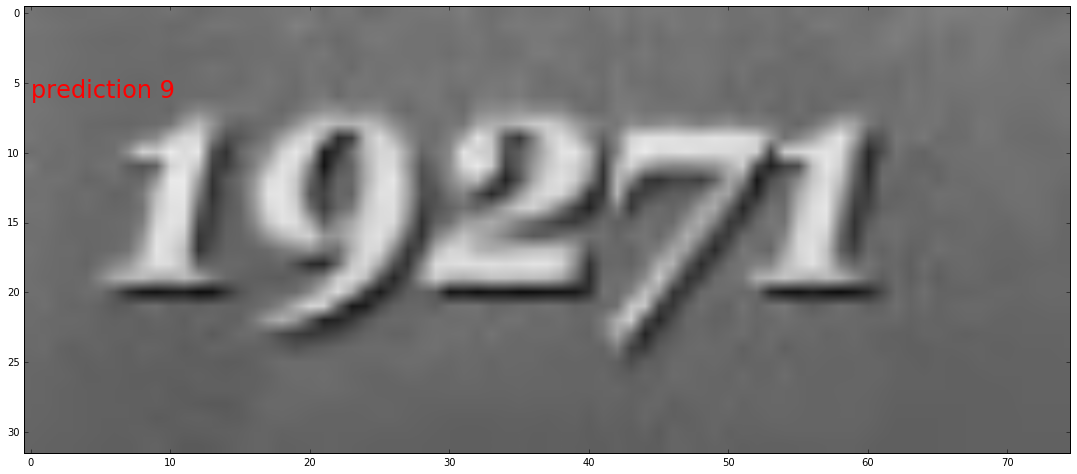

In [8]:
if True:
    img = cv2.imread('/world/data-c1/censhusheng/TestData/game/8.jpg',0)
    img = cv2.resize(img, (img.shape[1]*32/img.shape[0], 32))
    #img = cv2.blur(img, (3, 3))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    #img = cv2.imread('data/test/text/2322.jpg')
        
    print img.shape, img.dtype
    #img = cv2.bitwise_not(img)
    
    t0 = time.time()
    _str = _lstm_ocr_model.forward_ocr(img)
    print("time:%.3f"%(time.time() - t0))

    plt.imshow(img)
    plt.gca().text(0, 6,
                    '{:s} {:s}'.format("prediction", _str),
                    #bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                    fontsize=24, color='red')
    plt.show()

In [2]:
import time
from IPython import display

for i in range(1,0):
    display.clear_output(wait=True)
    im = cv2.imread('data/test/text/%d.jpg'%(i*50))
    plt.imshow(im[:,:,::-1]);plt.show()

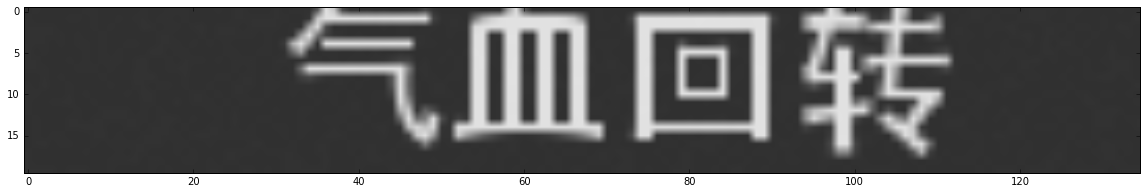

In [3]:
sys.path.append('./generate_data')
from generate_data import GenTextLine

G = GenTextLine(['./generate_data/fonts/Songti.ttc', 
                 './generate_data/fonts/PingFang.ttc',
                 './generate_data/fonts/Kai.ttf', 
                 './generate_data/fonts/STHeitiMedium.ttc'], 20)

import random
words = [u"等级",u"体质",u"根骨",u"力道",u"身法",u"元气",u"攻击力",
         u"命中",u"会心",u"会心效果",u"加速",u"破防",u"无双",u"外功防御",
         u"内功防御",u"闪躲",u"招架",u"拆招",u"御劲",u"化劲",
         u"气血回转",u"内力回转",u"跑速",u"治疗量"]
for i in range(100):
    display.clear_output(wait=True)
    
    plate_str = unicode(str(random.randint(0,999)))
    if random.random() < 0.5:
        plate_str =  u'等级' + plate_str
    if random.random() < 0.5:
        plate_str = plate_str + u'.' + unicode(str(random.randint(0,99)))
    if random.random() < 0.5:
        plate_str = plate_str + u'%'
        
    if random.random() < 0.25:
        plate_str = random.choice(words)

    plate_str = plate_str[:9] # ensure max length
    im = G.generate(plate_str)
    plt.imshow(im, cmap='gray', vmin = 0, vmax = 255);plt.show()